In [71]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cf
import netCDF4
import pandas as pd
import math
import seaborn as sns

In [179]:
#import datasets for external parameters, ICON grid, city coordinates

extpar1 = xr.open_dataset( '../icon_extpar_0024_R02B06_G_20200917_tiles.nc' )
grid1 = xr.open_dataset('../fc_DOM01_0121_mem001_NU_grid.nc')
cities = xr.open_dataset('../det_data_all_2022/fc_DOM01_0001_NU_urban_grid.nc')

In [187]:
#extract coords

src_data = np.degrees(np.asarray(extpar1['topography_c']))
cx = np.degrees(np.asarray(grid1['clon']))
cy = np.degrees(np.asarray(grid1['clat']))

In [188]:
#filter central european cities

cities_coords = cities.where(
    (cities['clon'] >= 0.10472) &
    (cities['clon'] <= 0.418879) &
    (cities['clat'] >= 0.8030) &
    (cities['clat'] <= 0.959931),
    drop=True
)

In [189]:
cx_city = np.degrees(np.asarray(cities_coords['clon']))
cy_city = np.degrees(np.asarray(cities_coords['clat']))

In [190]:
# Set the limits for Europe for the plot 
lon_min, lon_max = 5, 25 
lat_min, lat_max = 45, 55  

# Filter data within the specified limits
mask = (cx >= lon_min) & (cx <= lon_max) & (cy >= lat_min) & (cy <= lat_max)
cx_europe = cx[mask]
cy_europe = cy[mask]
src_data_europe = src_data[mask]

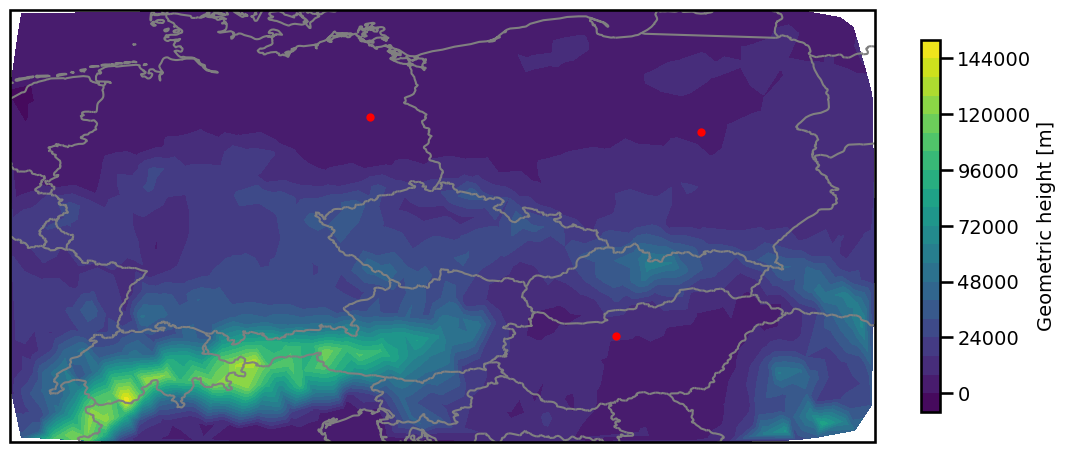

In [191]:
#plot

fig = plt.figure(figsize=(12, 12))
ax  = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.BORDERS, edgecolor='grey')
ax.add_feature(cf.COASTLINE, edgecolor='grey')
contour = ax.tricontourf(cx_europe, cy_europe, src_data_europe, transform=ccrs.PlateCarree(), levels = 20)
ax.scatter(cx_city[:3], cy_city[:3], s=20, c='red', alpha=1, transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', fraction = 0.02, pad = 0.05)
cbar.set_label('Geometric height [m]', size = 14)
cbar.ax.tick_params(labelsize=14)
plt.savefig('../plots_2024/topography_map_ensemble.jpeg', dpi=200)
plt.show()